In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

First set the path below to the location of the training data folder. These will always be in stabilitydataset/data, then the folder for the particular dataset (random, resonant, ...), and finally the specific training data set. The first part of the folder name will be the name of the function in stabilitydataset/generate_data/training_data_functions that was used to generate, and behind it are parameters.

In [41]:
datapath = '/mnt/ssd/workspace/stability/MLstability/training_data/resonant/orbtseriesNorbits10000.0Nout1729/'

In all cases, there will be a masses.csv (masses for each of the three bodies in units of the central star's mass) and labels.csv file:

In [42]:
runstrings = pd.read_csv(datapath+'runstrings.csv', index_col=0)
runstrings.tail()

,runstring
9994,0009995.bin
9995,0009996.bin
9996,0009997.bin
9997,0009998.bin
9998,0009999.bin


In [43]:
labels = pd.read_csv(datapath+'labels.csv', index_col=0)
labels.tail()

,runstring,instability_time,shadow_instability_time,Stable
9994,0009995.bin,9.990000e+08,9.990000e+08,True
9995,0009996.bin,3.814426e+06,6.124299e+06,False
9996,0009997.bin,1.498363e+04,3.320307e+03,False
9997,0009998.bin,9.419807e+05,8.353625e+05,False
9998,0009999.bin,1.895071e+07,2.047024e+07,False


- Each was run up to 1.e9 orbits of the innermost planet. Time is in units of the innermost's (initial) orbital period
- If planets crossed within a Hill sphere, the time is recorded under instability_time. Otherwise it will be the total integration time of approximately 1e9
- shadow_instability_time is the instability time for initial conditions slightly offset at t=0. You expect a distribution of instability_times, so these will be different from one another (unless both 1e9)
- Stable is a boolean for whether instability_time (not the shadow) reached the max of 1e9 orbits without collisions
- can use stable for classification, instability_time for regression problem

The actual trainingdata (whose form will depend on the function with which it was generated, see above) is in:

In [44]:
data = np.load(datapath+'trainingdata.npy')

Here we've run on the resonant dataset

- This file (~6 GB) has time series for each of the 25000 runs, using the indices above. 
- Each system has 1729 recorded times (chosen so as to be 'relatively prime' and minimize sampling issues)
- Each of the 1729 samples has 19 values
- index 0 is the time in the simulation, in units of the innermost planet's (initial) orbital period
- index 1-6 are first planet's semimajor axis, eccentricity, inclination, longitude of ascending node, longitude of pericenter, and mean anomaly
- index 7-12 are for the second planet, same things
- index 13-18 are for the third planet

In [45]:
data.shape

(9999, 1729, 19)

Plot simulation with index 78's eccentricity evolution of the 2nd planet: 

In [60]:
labels.head(20)

,runstring,instability_time,shadow_instability_time,Stable
0,0000000.bin,1.545872e+06,3.063700e+06,False
1,0000001.bin,9.990000e+08,9.990000e+08,True
2,0000002.bin,9.990000e+08,9.990000e+08,True
3,0000003.bin,2.287671e+06,8.392234e+06,False
4,0000004.bin,9.668931e+05,3.380350e+05,False
5,0000005.bin,5.755894e+05,5.459781e+04,False
6,0000006.bin,7.248372e+07,3.243220e+08,False
7,0000007.bin,2.225858e+04,6.193744e+03,False
8,0000008.bin,2.930966e+05,1.359759e+06,False
9,0000009.bin,3.484791e+05,9.534973e+05,False


In [101]:
index=18
system = data[index, :, :]

Text(0.5, 1.0, 't_inst=9.9e+07')

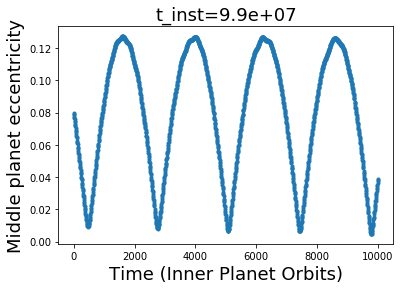

In [102]:
fig, ax = plt.subplots()
ax.plot(system[:,0], system[:,8], '.')
ax.set_xlabel('Time (Inner Planet Orbits)', fontsize=18)
ax.set_ylabel('Middle planet eccentricity', fontsize=18)
ax.set_title('t_inst={:.1e}'.format(labels.loc[index]['instability_time']), fontsize=18)

We only want to analyze the systems that remained stable beyond 1e4 orbits (since we're doing the short integration anyway so no need to run it through when Nbody shows it's unstable). So you would only use the samples with 'instability_time' > 1e4 for training

In [10]:
labelscut = labels[labels['instability_time']>1e4]
labels.shape

(9999, 4)

In [11]:
labelscut.head()

,runstring,instability_time,shadow_instability_time,Stable
0,0000000.bin,1.545872e+06,3.063700e+06,False
1,0000001.bin,9.990000e+08,9.990000e+08,True
2,0000002.bin,9.990000e+08,9.990000e+08,True
3,0000003.bin,2.287671e+06,8.392234e+06,False
4,0000004.bin,9.668931e+05,3.380350e+05,False


I think you could grab them like this. Worth checking:

In [12]:
labelscut.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998],
           dtype='int64', length=9999)

In [13]:
test = data[labelscut.index, :, :]

In [14]:
test.shape

(9999, 1729, 19)